In [37]:
import numpy as np
from torch import nn

from gnn_tracking.models.edge_classifier import ECForGraphTCN
from gnn_tracking.utils.dictionaries import expand_grid


def count_parameters(model: nn.Module):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

In [45]:
from gnn_tracking.models.track_condensation_networks import PreTrainedECGraphTCN

grid = dict(
    interaction_node_dim = [32, 64, 90, 128],
    interaction_edge_dim = [32, 64, 90, 128],
    L_ec = [6],
    L_hc = [3],
    use_intermediate_edge_embeddings = [True, False],
)
configs = expand_grid(grid)
for config in configs:
    ec = ECForGraphTCN(
        node_indim=7,
        edge_indim=4,
        interaction_node_dim=config["interaction_node_dim"],
        interaction_edge_dim=config["interaction_edge_dim"],
        L_ec=config["L_ec"],
        use_intermediate_edge_embeddings=config["use_intermediate_edge_embeddings"]
    )
    tcn = PreTrainedECGraphTCN(
        ec,
        node_indim=7,
        edge_indim=4,
        h_dim=config["interaction_node_dim"],
        e_dim=config["interaction_edge_dim"],
        h_outdim=12,
        L_hc=config["L_hc"]
    )
    config["n_parameters"] = count_parameters(tcn)

In [46]:
import pandas as pd

df = pd.DataFrame.from_records(configs).sort_values("n_parameters")

In [47]:
df

,interaction_node_dim,interaction_edge_dim,L_ec,L_hc,use_intermediate_edge_embeddings,n_parameters
1,32,32,6,3,False,260494
0,32,32,6,3,True,408526
3,32,64,6,3,False,476302
9,64,32,6,3,False,612302
5,32,90,6,3,False,701410
8,64,32,6,3,True,809486
11,64,64,6,3,False,928462
2,32,64,6,3,True,968974
17,90,32,6,3,False,1011246
7,32,128,6,3,False,1110670


In [48]:
df.query("interaction_node_dim == interaction_edge_dim").rename(
    {
        "interaction_edge_dim": "edge",
        "interaction_node_dim": "node"
    },
    axis=1
)

,node,edge,L_ec,L_hc,use_intermediate_edge_embeddings,n_parameters
1,32,32,6,3,False,260494
0,32,32,6,3,True,408526
11,64,64,6,3,False,928462
10,64,64,6,3,True,1519438
21,90,90,6,3,False,1781834
20,90,90,6,3,True,2949854
31,128,128,6,3,False,3530062
30,128,128,6,3,True,5891662


In [41]:
rs = []
xs =  np.arange(32, 128, 10)
rs2 = []
for i in xs:
    ec = ECForGraphTCN(
        node_indim=7,
        edge_indim=4,
        interaction_node_dim=i,
        interaction_edge_dim=i,
        L_ec=3,
        use_intermediate_edge_embeddings=False
    )
    rs.append(count_parameters(ec))
    ec = ECForGraphTCN(
        node_indim=7,
        edge_indim=4,
        interaction_node_dim=i,
        interaction_edge_dim=32,
        L_ec=3,
        use_intermediate_edge_embeddings=False
    )
    rs2.append(count_parameters(ec))

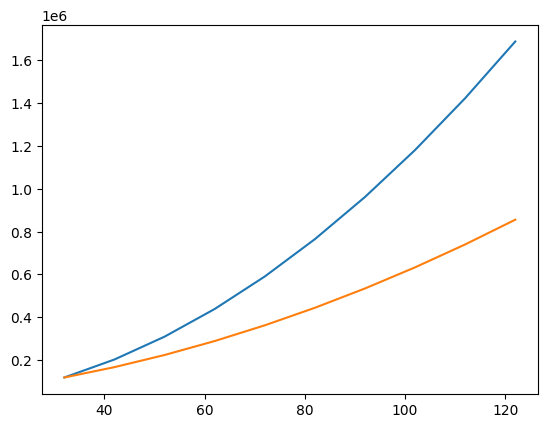

In [42]:
from matplotlib import pyplot as plt

plt.plot(xs, rs)
plt.plot(xs, rs2)